# Exploración inicial del dataset de Puntos de Interés (POI)

En este Notebook haremos la **EDA** (*Exploratory Data Analysis*) para:

### Objetivos de esta EDA

1. **Comprender el tamaño y la estructura** del dataset (nº de filas, columnas y su tipado).  
2. **Evaluar la calidad de los datos**  
   * Detectar valores nulos, duplicados o incoherentes.  
   * Verificar rangos y distribuciones para cada variable.  
3. **Identificar posibles problemas** que resolveremos durante el preprocesado:  
   * Columnas irrelevantes, codificación de categorías de alta cardinalidad, métricas de engagement sesgadas, etc.  
4. **Visión rápida del target**: inspeccionar la futura métrica de engagement para asegurarnos de que no hay clases muy desbalanceadas.





Importamos Librerias a usar en este NoteBook:


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2

Cargamos y Visualizamos nuestro dataset:


In [4]:
data = pd.read_csv('poi_dataset.csv')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   categories        1569 non-null   object 
 4   tier              1569 non-null   int64  
 5   locationLon       1569 non-null   float64
 6   locationLat       1569 non-null   float64
 7   tags              1569 non-null   object 
 8   xps               1569 non-null   int64  
 9   Visits            1569 non-null   int64  
 10  Likes             1569 non-null   int64  
 11  Dislikes          1569 non-null   int64  
 12  Bookmarks         1569 non-null   int64  
 13  main_image_path   1569 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 171.7+ KB


## Metadatos del dataset

| Columna | Tipo (`dtype`) | Descripción breve |
|---------|---------------|-------------------|
| `id` | object | Identificador único del POI |
| `name` | object | Nombre del POI |
| `shortDescription` | object | Descripción textual corta |
| `categories` | object | Lista de categorías principales |
| `tags` | object | Lista amplia de etiquetas descriptivas |
| `tier` | int64 | Nivel de relevancia |
| `locationLon` | float64 | Longitud geográfica |
| `locationLat` | float64 | Latitud geográfica |
| `xps` | int64 | Puntuación de experiencia para el usuario |
| `Visits` | int64 | Nº de Visitas |
| `Likes` | int64 | Nº de “me gusta” |
| `Dislikes` | int64 | Nº de “no me gusta” |
| `Bookmarks` | int64 | Nº de marcadores |
| `main_image_path` | object | Ruta local a la imagen principal |

### Fotografía global del dataset

* **Filas:** 1 569  
* **Columnas:** 14  
* **Valores nulos:** 0  
* **Tipos numéricos:** 2 floats + 6 ints  
* **Columnas `object` a transformar:** `id`, `name`, `shortDescription`, `categories`, `tags`, `main_image_path`



In [128]:
data.head()

,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,"['Escultura', 'Pintura']",1,2.642262,39.572694,[],500,10009,422,3582,78,data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...","['Patrimonio', 'Historia']",1,-3.704467,40.423037,[],500,10010,7743,96,2786,data_main/e32b3603-a94f-49df-8b31-92445a86377c...
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...","['Ciencia', 'Patrimonio']",2,-3.699694,40.442045,[],250,10015,3154,874,595,data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",['Cultura'],1,-3.691228,40.427256,[],500,10011,8559,79,2358,data_main/390d7d9e-e972-451c-b5e4-f494af15e788...
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...","['Patrimonio', 'Cultura']",1,-3.727822,40.439665,[],500,10020,915,2896,143,data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...


### Inspección rápida de tags

In [18]:
print(data["tags"].str.contains("\[\]").sum())
print(data["tags"].str.strip()=="[]")
print("Porcentaje de POIs con tags []: ", data["tags"].str.strip().value_counts(normalize=True)["[]"] * 100)



107
0        True
1        True
2        True
3        True
4        True
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
Name: tags, Length: 1569, dtype: bool
Porcentaje de POIs con tags []:  6.8196303377947745


> **Hallazgo sobre `tags`**  
> * Registros sin etiquetas: **107** de **1 569** (≈ 6,8 %).

### Estadísticos descriptivos  

In [5]:
data.describe()

,tier,locationLon,locationLat,xps,Visits,Likes,Dislikes,Bookmarks
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,1.541109,-1.132337,39.900141,750.382409,10011.943276,3623.908222,2526.305927,973.261950
std,0.637677,22.733401,9.662134,228.319854,5.456808,4817.879374,2225.543360,1453.333948
min,1.000000,-121.951049,-62.940930,0.000000,10001.000000,100.000000,52.000000,50.000000
25%,1.000000,-3.725292,40.411754,600.000000,10008.000000,464.000000,937.000000,116.000000
50%,1.000000,-3.699140,40.421738,700.000000,10011.000000,1434.000000,2718.000000,306.000000
75%,2.000000,-3.673348,40.472458,1000.000000,10015.000000,6840.000000,3399.000000,1309.000000
max,4.000000,158.333118,65.706572,1000.000000,10038.000000,26425.000000,10999.000000,8157.000000


* **Métricas de engagement muy sesgadas** (`Visits`, `Likes`, `Dislikes`, `Bookmarks`)  
  * Máximos muy superiores a la media → distribuciones con colas pronunciadas.  
  * Evaluaremos transformar con `log1p` 

count    1569.000000
mean      750.382409
std       228.319854
min         0.000000
25%       600.000000
50%       700.000000
75%      1000.000000
max      1000.000000
Name: xps, dtype: float64


Text(0.5, 1.0, 'Histograma de XPS')

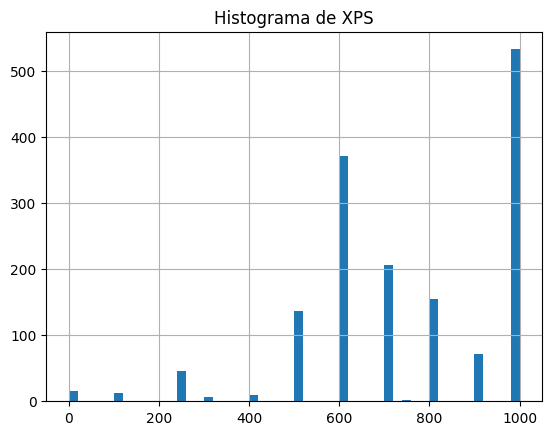

In [ ]:
#Exploramos nuestro campo 'xps'
print(data['xps'].describe())
data['xps'].hist(bins=50)
plt.title('Histograma de XPS')   

#### Hallazgos sobre `xps`

* **Escala discreta** → los valores aparecen en saltos de 100 pts (0, 100, 200, …, 1000).  
* **Sesgo a la derecha** → el pico principal está en 1000 pts.  


> Esto sugiere que `xps` podría ser una **puntuación de “nivel”** o “gamificación” ya normalizada.  
> En el modelado lo trataremos como **numérica discreta** (o incluso *ordinal*), y seguramente no necesitaremos normalizarla salvo para escalar todas las features al mismo rango.


count    1569.000000
mean        1.541109
std         0.637677
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: tier, dtype: float64


Text(0.5, 1.0, 'Histograma de TIER')

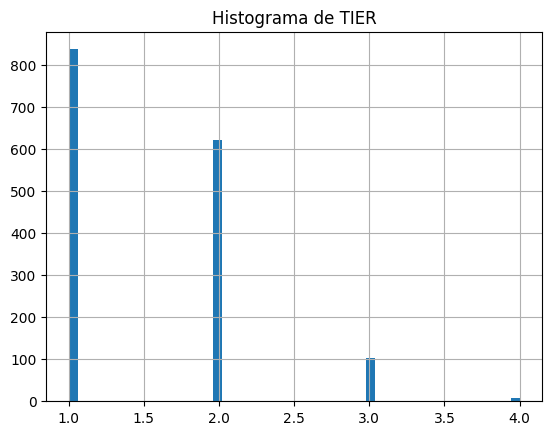

In [200]:
#Exploramos el campo 'tier'
print(data['tier'].describe())
data['tier'].hist(bins=50)
plt.title('Histograma de TIER')  

#### Hallazgos sobre `tier`

* Variable **ordinal** con 4 niveles (1 → mínima relevancia, 4 → máxima).  
* Distribución desequilibrada

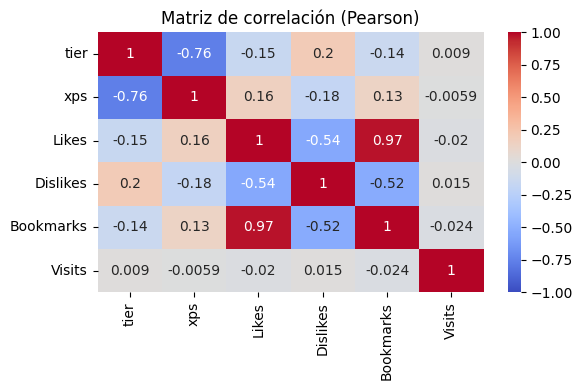

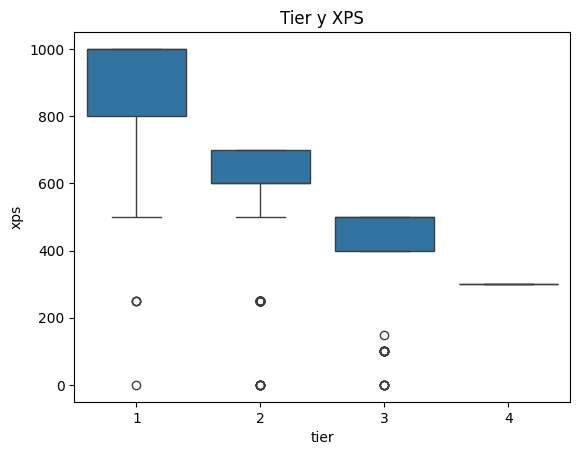

In [202]:

num_cols = ['tier', 'xps', 'Likes', 'Dislikes', 'Bookmarks', 'Visits']
corr = data[num_cols].corr(method='pearson')

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación (Pearson)"); plt.tight_layout()
plt.show()


sns.boxplot(x='tier', y='xps', data=data)
plt.title("Tier y XPS"); plt.show()


#### Matriz de correlación

* **Multicolinealidad**  
  * `Likes` y `Bookmarks` presentan ρ = 0.97 → una de las dos puede eliminarse o combinarse (`engagement_score = Likes + Bookmarks`).  
* **Polaridad de la opinión**  
  * `Likes` y `Dislikes` correlan -0.54 → confirman que representan extremos opuestos de una misma métrica.  
* **Relación inversa `tier` vs `xps`**  
  * ρ = -0.76 sugiere que los POIs más relevantes (Tier alto) requieren menor “experiencia” (`xps`) para el usuario, o que ambos se calculan con criterios diferentes.  
* **`Visits` casi desligado** del resto → podría aportar señal complementaria.

> **Implicaciones**  
> * Revisar multicolinealidad antes de entrenar modelos lineales.  
> * Evaluar fusión/eliminación de `Likes` & `Bookmarks`.  
> * Profundizar en la definición de `tier` y `xps` para entender su relación.



## Columnas tipo *object*
### Detección de duplicados  
Comprobamos si el identificador `id`que **debería ser único** para cada POI 
aparece repetido.    

In [20]:
dup_rows   = data['id'].duplicated().sum()         # 77 filas duplicadas
dup_pois   = data[data['id'].duplicated(keep=False)]['id'].nunique()  #  nº POIs afectados
pct_rows   = dup_rows / len(data) * 100
print(f"Filas duplicadas: {dup_rows}  ({pct_rows:.1f} %)")




Filas duplicadas: 77  (4.9 %)


In [171]:
# Revisamos si con esas ids hay duplicados en las demás columnas
for id in duplicate_ids:
    duplicate_rows = data[data['id'] == id]
    if duplicate_rows.shape[0] > 1:
        print(f"Duplicate rows for ID {id}:")
        print(duplicate_rows)

Duplicate rows for ID 04be145b-f73e-41aa-9332-d1702684dc53:
                                        id                   name  \
1178  04be145b-f73e-41aa-9332-d1702684dc53  El bosque de Dartmoor   
1179  04be145b-f73e-41aa-9332-d1702684dc53  El bosque de Dartmoor   
1180  04be145b-f73e-41aa-9332-d1702684dc53  El bosque de Dartmoor   
1181  04be145b-f73e-41aa-9332-d1702684dc53  El bosque de Dartmoor   

                                       shortDescription  \
1178  Explora Dartmoor, el misterioso páramo que ins...   
1179  Explora Dartmoor, el misterioso páramo que ins...   
1180  Explora Dartmoor, el misterioso páramo que ins...   
1181  Explora Dartmoor, el misterioso páramo que ins...   

                                       categories  tier  locationLon  \
1178  ['Ocio', 'Historia', 'Cultura', 'Misterio']     1    -3.901605   
1179  ['Ocio', 'Historia', 'Cultura', 'Misterio']     1    -3.901605   
1180  ['Ocio', 'Historia', 'Cultura', 'Misterio']     1    -3.901605   
1181  ['Oc

#### Duplicados en `id`

* 77 filas duplicadas (≈ 4,9 % del dataset)  
* los valores de Tags,Visits,Likes,Dislike son los únicos que cambian.  
* Para evitar *data-leakage* en el notebook de preprocesado
  1. Fusionamos información complementaria.
 



In [175]:
non_numeric_cols = data.select_dtypes(exclude='number').columns.tolist()
print(non_numeric_cols)

for col in non_numeric_cols:
    print(f"{col} → {type(data[col][0])}")


['id', 'name', 'shortDescription', 'categories', 'tags', 'main_image_path']
id → <class 'str'>
name → <class 'str'>
shortDescription → <class 'str'>
categories → <class 'str'>
tags → <class 'str'>
main_image_path → <class 'str'>


#### Resumen de columnas `object`

* **`categories` / `tags`**  
  * Actualmente son strings que contienen listas.  
  * Paso pendiente en preprocesado: listas Python reales.  
  * Decidir representación posterior (one-hot, embeddings,etc)

* **`shortDescription`**  
  * Texto libre calcularemos longitud y vocabulario para valorar un modelo de Tokenización.

* **`main_image_path`**  
  * Ruta local a la imagen. Verificaremos que todas existan y sean accesibles antes 

* **`id`**  
  * resolver duplicados.



### Vamos a explorar los datos  de LocationLat/Lon

In [ ]:
# pip install plotly  (si aún no lo tienes)
import plotly.express as px

fig = px.scatter_geo(
    data,
    lat="locationLat",
    lon="locationLon",
    hover_name="name",                
    hover_data={"tier": True, "Likes": True},
    projection="natural earth",
    width=700,   
    height=550
)
fig.update_traces(marker=dict(size=5, opacity=0.7))

fig.show()      


### Visualización de Imagenes y paths

In [24]:
data.main_image_path

0       data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...
1       data_main/e32b3603-a94f-49df-8b31-92445a86377c...
2       data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...
3       data_main/390d7d9e-e972-451c-b5e4-f494af15e788...
4       data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...
                              ...                        
1564    data_main/a1058fc5-8b4e-43db-8758-2a4197eb69ca...
1565    data_main/77df8476-484e-436e-8977-f957f6b9371a...
1566    data_main/21c741f5-cbe7-4ae0-a69d-b5c1622056af...
1567    data_main/4b8b38fa-78b5-4ea8-a676-1de4e2b48caa...
1568    data_main/d7f45b8d-c311-4309-a85a-d91f1fcd3b2f...
Name: main_image_path, Length: 1569, dtype: object

In [25]:
data.main_image_path.apply(lambda x: cv2.imread(x).shape).value_counts()

main_image_path
(128, 128, 3)    1569
Name: count, dtype: int64

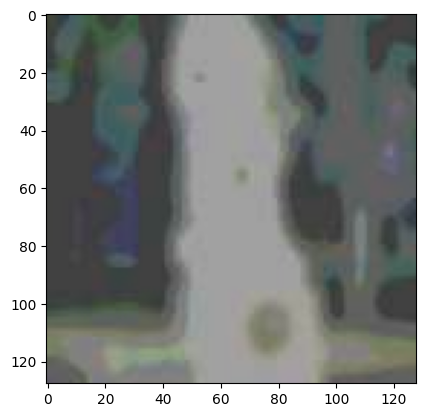

In [35]:
plt.imshow(cv2.imread(data.main_image_path.iloc[random.randint(0, len(data))]))


#### Hallazgos sobre imágenes

* **Integridad** → Las 1 569 rutas de `main_image_path` cargan sin error (*cv2.imread* devuelve shape válida).  
* **Resolución fija 128 × 128** → dataset ya pre-redimensionado, útil para prototipado rápido pero quizá limitado para *fine-tuning* de CNNs más profundas.  




Mean (R,G,B): [0.4334969  0.44886053 0.45425147]
Std  (R,G,B): [0.27410612 0.264392   0.26839465]


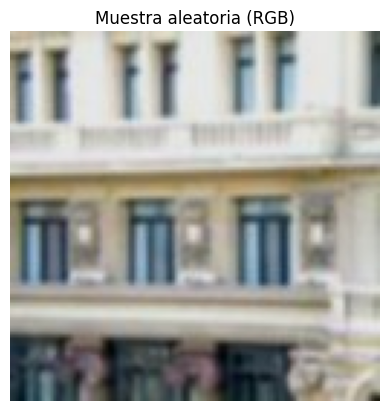

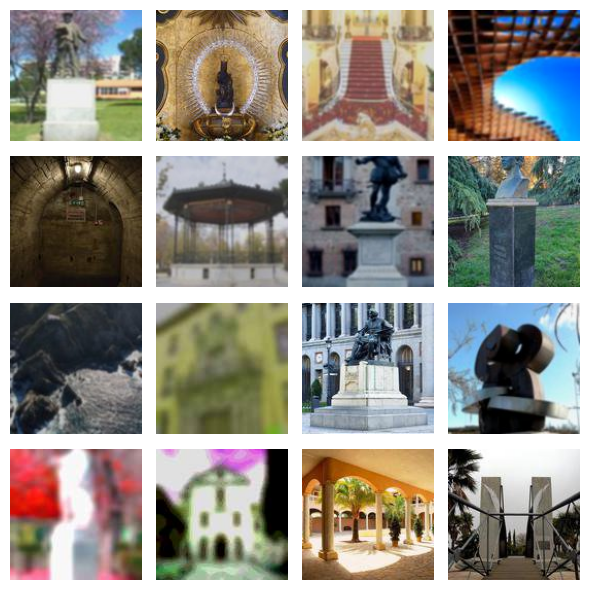

In [36]:
# 1. Mostrar imagen correctamente coloreada
import random, cv2, matplotlib.pyplot as plt
img = cv2.imread(data['main_image_path'].iloc[random.randint(0, len(data)-1)])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off'); plt.title('Muestra aleatoria (RGB)')

# 2. Grid 4×4 de ejemplos
fig, axes = plt.subplots(4,4, figsize=(6,6))
for ax in axes.ravel():
    img = cv2.imread(data['main_image_path'].iloc[random.randint(0, len(data)-1)])
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.tight_layout()

# 3. Estadística básica de pixel values
import numpy as np
stats = []
for p in data['main_image_path'].sample(200, random_state=42):   # sub-sample por rapidez
    img = cv2.imread(p).astype(np.float32)/255
    stats.append(img.reshape(-1,3))
stats = np.concatenate(stats, axis=0)
print("Mean (R,G,B):", stats.mean(axis=0))
print("Std  (R,G,B):", stats.std(axis=0))


#### Estadística global de píxeles

| Canal | Media | Desv. estándar |
|-------|-------|----------------|
| **R** | 0.433 | 0.274 |
| **G** | 0.449 | 0.264 |
| **B** | 0.454 | 0.268 |

*Las medias se sitúan alrededor de 0.44 (en [0–1]), con una leve predominancia del azul.  
La dispersión homogénea entre canales indica buen balance de color.*

> **Implicaciones para el preprocesado**  
> 1. Normalizaremos las imágenes con **`(x – mean) / std`** usando los valores anteriores.  
> 2. Añadiremos **data-augmentation** (flip, rotate, color-jitter) para contrarrestar el blur y enriquecer la variabilidad visual.  
> 3. Considerar re-escalar a **224 × 224 px** si vamos a _fine-tunear_ redes pre-entrenadas (ResNet, EfficientNet, etc.).
